In [23]:
import cv2
import numpy as np
import os

# Đọc ảnh gốc
image = cv2.imread(r'D:\PROJECTs\Handwritten Digit\test_image_1.jpg')


# Chuyển đổi sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thay đổi kích thước thành 28x28 pixel
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

inverted = 255 - resized

# Lưu ảnh kết quả
cv2.imwrite('anh_xam_28x28.jpg', resized)

# Hiển thị ảnh (tùy chọn)
cv2.imshow('Anh xam 28x28', resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [37]:
model = torch.load('.\model.pth')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\2631827028.py:1: SyntaxWarning: invalid escape sequence '\m'
  model = torch.load('.\model.pth')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\2631827028.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you star

In [28]:
# Chuyển sang PIL Image
img = F.to_pil_image(inverted)
type(img)

PIL.Image.Image

In [29]:
img

In [ ]:
inverted = F.to_tensor(inverted)

In [52]:
inverted.max()

tensor(0.3686)

In [60]:
inverted.shape

torch.Size([1, 28, 28])

In [72]:
# Load model
model = torch.load('.\model.pth')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\99738698.py:2: SyntaxWarning: invalid escape sequence '\m'
  model = torch.load('.\model.pth')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\99738698.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start se

In [74]:
model.eval()

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import numpy as np

def predict_image(image_path, model):
    # Chuyển đổi và chuẩn bị ảnh
    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)

    # show image
    plt.imshow(image.squeeze().numpy(), cmap='gray')

    # to device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    image = image.to(device)
    
    # Chuyển mô hình sang chế độ đánh giá
    model.eval()
    
    # Dự đoán
    with torch.no_grad():
        output = model(image)
        
    # Lấy kết quả dự đoán
    _, predicted = torch.max(output, 1)
    return predicted.item()

In [96]:
# Dự đoán ảnh
image_path = 'test_image_3.png'
prediction = predict_image(image_path, model)
print(f"Dự đoán: {prediction}")


RuntimeError: output with shape [1, 28, 28] doesn't match the broadcast shape [3, 28, 28]

In [59]:
model(inverted)

TypeError: 'collections.OrderedDict' object is not callable

In [54]:
nn.Flatten()(inverted)

tensor([[0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0314, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0314, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0314, 0.0353, 0.0

In [30]:
trans = transforms.Compose([transforms.ToTensor()])
img = trans(img)

d:\PROJECTs\Handwritten Digit\venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [31]:
img_gpu = img.cuda()
img_gpu.device

device(type='cuda', index=0)

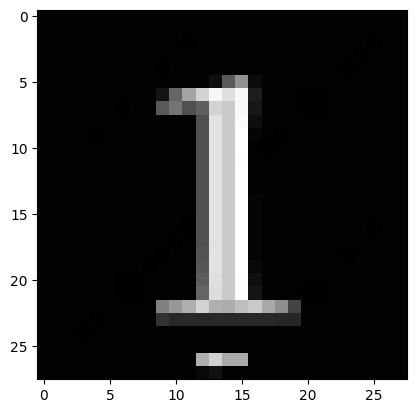

In [32]:
image = F.to_pil_image(img)
plt.imshow(image, cmap="gray")

In [33]:
# Dự đoán
model(in)

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'